<a href="https://colab.research.google.com/github/kbotnen/pythonki_v25/blob/main/kode/Pythonkurs%20-%2001%20-%20Fredag%20-%20Clustering%20with%20k-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Choosing the right estimator](https://github.com/kbotnen/pythonki_v25/blob/main/kode/ml_map.png?raw=1)

[https://scikit-learn.org/stable/machine_learning_map.html](https://scikit-learn.org/stable/machine_learning_map.html)

In [1]:
import sklearn #
print('Version: ', sklearn.__version__)

Version:  1.6.1


In [2]:
from sklearn import set_config
set_config(display="diagram")

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Work with Sample Data

## Generating Blobs - Documentation

[https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators](https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators)

In [4]:
from sklearn.datasets import make_blobs
# In an interactive environment we can read documentation inline.
?make_blobs

## Sample Dataset

In [5]:
data_a, labels_a = make_blobs(
    n_samples=200, # Number of samples in the dataset.
    n_features=2, # Number of features for each sample in the dataset.
    centers=5, # Number of clusters.
    random_state=42 # Make it deterministic.
)

print(f'Data shape: {data_a.shape}')
print(data_a[:3])
print(f'Labels shape: {labels_a.shape}')
print(labels_a[:3])

Data shape: (200, 2)
[[-8.0799236  -7.21461083]
 [-2.42215055  8.71527878]
 [ 0.57421589  2.75398778]]
Labels shape: (200,)
[2 0 4]


## Visualizing 2D Data

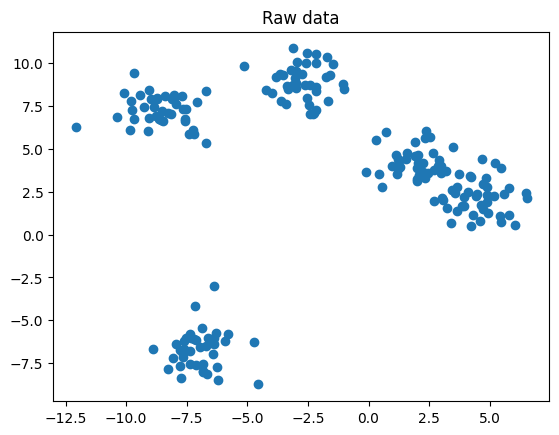

In [6]:
import matplotlib.pyplot as plt
plt.scatter(data_a[:, 0], data_a[:, 1])
plt.title('Raw data')
plt.show()

## Boolean Indexing

In [7]:
import numpy as np
sample = np.array(['A', 'B', 'C'])
boolean_comp = np.array([0, 0, 0])==np.array([1, 0, 1])
print(f'Data: {sample}')
print(f'Filter: {boolean_comp}')
print(f'Filtered data: {sample[boolean_comp]}')

Data: ['A' 'B' 'C']
Filter: [False  True False]
Filtered data: ['B']


## Visualizing Clusters

0
1
2
3
4


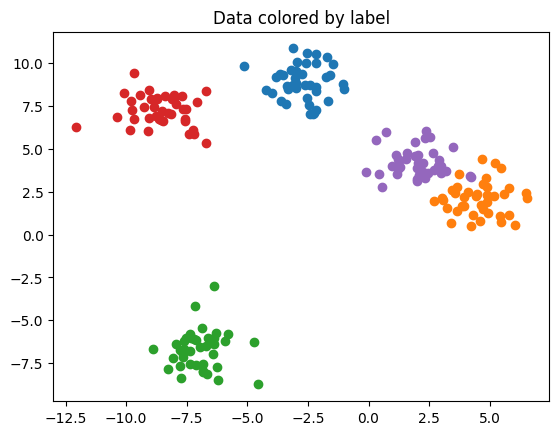

In [8]:
for label_a in np.unique(labels_a):
    print(label_a)
    data_filter_a = data_a[labels_a==label_a] # data_filter_a contain all values that has label_a
    plt.scatter(data_filter_a[:, 0], data_filter_a[:, 1])
    plt.title('Data colored by label')
plt.show()

# Understanding k-Means Clustering

## Bigger Dataset

In [9]:
# Generate a bigger dataset:
data_b, labels_b = make_blobs(
    n_samples=800,
    n_features=2,
    centers=10,
    random_state=42
)

# Inspect the data
print(f'Data shape: {data_b.shape}')
print(data_b[:3])
print(f'Labels shape: {labels_b.shape}')
print(labels_b[:3])

Data shape: (800, 2)
[[ 4.81305976  2.35848706]
 [-7.39349411 -7.93932312]
 [-6.53787122 -5.00393875]]
Labels shape: (800,)
[1 2 2]


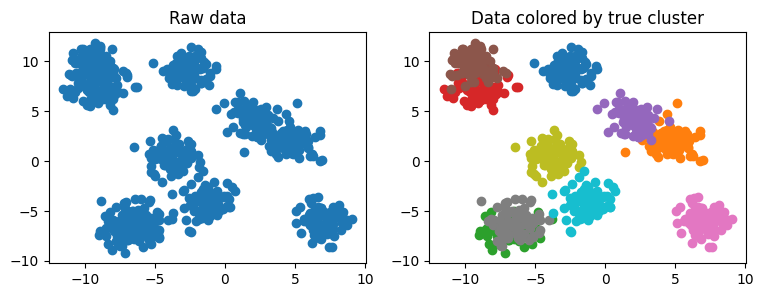

In [10]:
# Plot dataset samples:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3)) # Multiple plots, 1 row, 2 columns.

# Plot 1, raw.
axes[0].scatter(data_b[:, 0], data_b[:, 1])
axes[0].set_title('Raw data')

# Plot 2, with pretty colors.
for label_b in np.unique(labels_b):
    data_filter_b = data_b[labels_b==label_b]
    axes[1].scatter(data_filter_b[:, 0], data_filter_b[:, 1])
    axes[1].set_title('Data colored by true cluster')
plt.show()

## k-Means in SciKit-learn

In [11]:
# Generate a bigger dataset:
data_b, labels_b = make_blobs(
    n_samples=800,
    n_features=2,
    centers=10,
    random_state=42
)

# Inspect the data
print(f'Data shape: {data_b.shape}')
print(data_b[:3])
print(f'Labels shape: {labels_b.shape}')
print(labels_b[:3])

Data shape: (800, 2)
[[ 4.81305976  2.35848706]
 [-7.39349411 -7.93932312]
 [-6.53787122 -5.00393875]]
Labels shape: (800,)
[1 2 2]


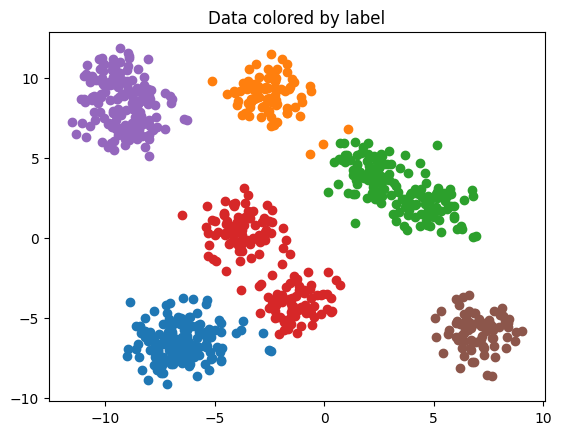

In [12]:
from sklearn.cluster import KMeans

clusterer = KMeans(
    init='random', # Choose n_clusters observations (rows) at random from data for the initial centroids.
    n_clusters=6, # The number of clusters to form as well as the number of centroids to generate.
    n_init='auto' # Number of times the k-means algorithm is run with different centroid seeds.
)

result_kmean = clusterer.fit_predict(data_b) # compute cluster centers and predict cluster index for each sample.

# Plot dataset samples:
for label_b in np.unique(result_kmean):
    data_filter_b = data_b[result_kmean==label_b]
    plt.scatter(data_filter_b[:, 0], data_filter_b[:, 1])
    plt.title('Data colored by label')

## How k-Means Works
*k*-means klustering algoritmen er iterativ av natur det vil si at den gjentar spesifikke steg frem til vi stopper den, eller at den konvergerer (resultatet ikke endrer seg lenger).

Det initielle steget i *k*-means innebærer at vi velger et tilfeldig senter for klusterene våre.

In [13]:
random_centroids = np.random.normal( # Draw random samples from a normal (Gaussian) distribution.
    loc=0, # Mean ('centre') of the distribution.
    scale=5, # Standard deviation (spread or 'width') of the distribution. Must be non-negative.
    size=(3, 2) # Output shape.
)
print(random_centroids)

[[ 0.1886203  -1.65809304]
 [-1.53537438 -5.80619043]
 [-5.22511796 -5.08059113]]


Når vi har centroidene vil k-means algoritmen tildele hvert datapunkt til den nærmeste centroiden. Når alle datapunkt er tildelt en centroide kalkuleres det en ny centroid for hvert cluster.

* Steg 1: Oppdater centroidene i hvert cluster (i første runden, initialiser en tilfeldig centroid for hvert cluster).
* Steg 2: Tildel hvert datapunkt til den centroiden som er nærmest.

Gjenta disse stegene til algoritmen konvergerer, altså at resultatet ikke endrer seg mer.

## Visualizing Algorithm Steps
Vi kan nå visualisere de første tre iterasjonene av *k*-means algoritmen.

Koden kan se litt komplisert ut, men det vi gjør er at vi begrenser *k*-means algoritmen til å gjøre en iterasjon av gangen. Dette gjør vi ved å sette 'n_init' og 'max_iter' til 1. I tilleg så setter vi 'init' av centroidene fra den forrige iterasjonen.

In [14]:
# Generate a bigger dataset:
data, labels = make_blobs(
    n_samples=800,
    n_features=2,
    centers=10,
    random_state=42
)

# Inspect the data
print(f'Data shape: {data.shape}')
print(data[:3])
print(f'Labels shape: {labels.shape}')
print(labels[:3])

Data shape: (800, 2)
[[ 4.81305976  2.35848706]
 [-7.39349411 -7.93932312]
 [-6.53787122 -5.00393875]]
Labels shape: (800,)
[1 2 2]


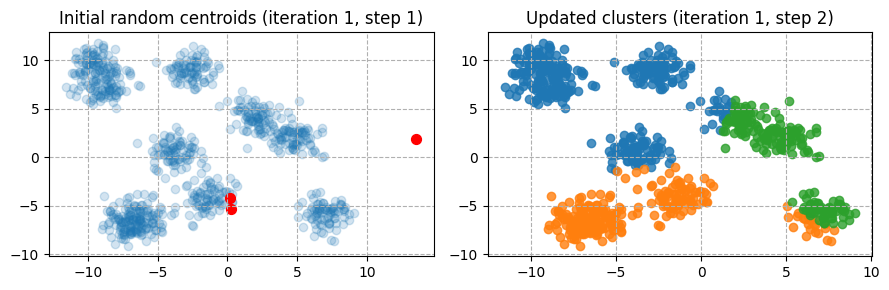

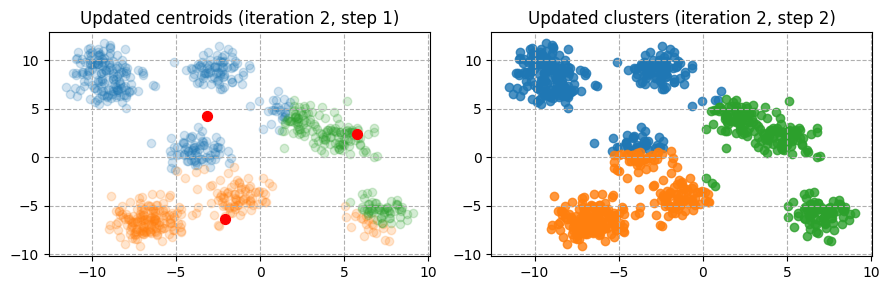

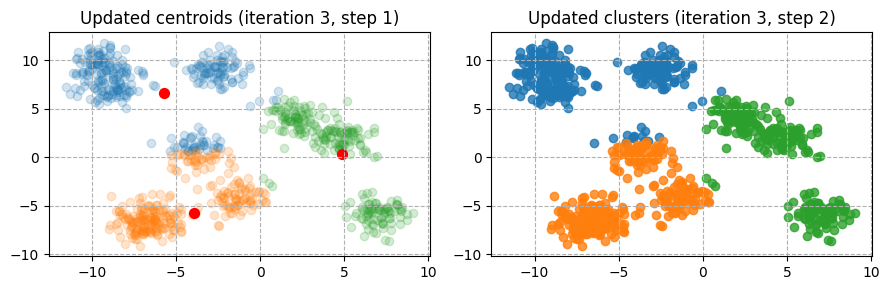

In [15]:
num_iterations = 3
previous_labels = None
centroids = np.random.normal(loc=0, scale=5, size=(3, 2))

# Plot dataset samples:
for i in range(num_iterations):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    clusterer = KMeans(n_clusters=3, init=centroids, n_init=1, max_iter=1)
    result_kmean = clusterer.fit_predict(data)

    # Plot step 1 values of iteration i:
    if i==0:
        axes[0].scatter(data[:, 0], data[:, 1], alpha=0.2)
        axes[0].set_title('Initial random centroids (iteration 1, step 1)')
    else:
        for label in np.unique(previous_labels):
            data_filter = data[previous_labels==label]
            axes[0].scatter(data_filter[:, 0], data_filter[:, 1], alpha=0.2) # x-coord, y-coord, alpha
            axes[0].set_title(f'Updated centroids (iteration {i+1}, step 1)')
    axes[0].scatter(centroids[:, 0], centroids[:, 1], s=50, alpha=1, c='r') # x-coord, y-coord, shape, alpha, color
    axes[0].grid(linestyle='--')

    # Plot step 2 values of iteration i:
    for label in np.unique(result_kmean):
        data_filter = data[result_kmean==label]
        axes[1].scatter(data_filter[:, 0], data_filter[:, 1], alpha=0.8) # x-coord, y-coord, alpha
        axes[1].set_title(f'Updated clusters (iteration {i+1}, step 2)')
    axes[1].grid(linestyle='--')
    previous_labels = result_kmean
    centroids = clusterer.cluster_centers_ # keeps info about each cluster center
    plt.tight_layout() # adjust the padding between and around subplots.
    plt.show()

## Dataset - Naturalearth cities

In [1]:
!pip install geopandas==0.14.4
import geopandas # conda install geopandas=0.14.4

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

print(f'World data shape: {world.shape}')
print(f'Cities data shape: {cities.shape}')

World data shape: (177, 6)
Cities data shape: (243, 2)


<ipython-input-1-768292bb37cb>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
<ipython-input-1-768292bb37cb>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


## Exploring Sample Data

In [ ]:
world.head()

In [ ]:
cities.head()

## Visualizing Data Points

In [ ]:
background_color = plt.rcParams['figure.facecolor']
lines_color = plt.rcParams['text.color']
_, ax = plt.subplots(1, figsize=(12, 8)) # Returns a Figure and an Axes object (or array of Axes).

base = world.plot(color=background_color, edgecolor=lines_color, linewidth=0.25, ax=ax) # Returns a matplotlib Axes instance
ax.set_axis_off()
cities.plot(ax=base, marker='o', c='red', markersize=10)

## Preprocessing Data

In [ ]:
cities['longitude'] = cities.geometry.x # <class 'pandas.core.series.Series'>
cities['latitude'] = cities.geometry.y # <class 'pandas.core.series.Series'>

print(type(cities))
cities.head()

In [ ]:
data = cities[['longitude', 'latitude']].to_numpy()
print(f'Data shape: {data.shape}')
print(type(data))

## Training a Model

In [ ]:
clusterer = KMeans(n_clusters=10, n_init='auto')
result_kmean = clusterer.fit_predict(data) # returns a <class 'numpy.ndarray'> indicating suggested cluster for each datapoint.
cities['cluster'] = result_kmean
cities.head()

## Helper Functions

In [ ]:
from itertools import cycle
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
colors = cycle(colors)
markers = [",","o","v","^","<",">","p","P","*","h","H"]
markers = cycle(markers)

In [ ]:
print(next(colors))
print(next(markers))
print(next(markers))
print(next(markers))
print(next(colors))

## Visualizing Results

In [ ]:
background_color = plt.rcParams['figure.facecolor']
lines_color = plt.rcParams['text.color']
_, ax = plt.subplots(1, figsize=(12, 8))

base = world.plot(color=background_color, edgecolor=lines_color, linewidth=0.25, ax=ax)
ax.set_axis_off()

for label in np.unique(result_kmean):
    cities_filter = cities[cities.cluster==label]
    cities_filter.plot(ax=base, marker=next(markers), c=next(colors), markersize=20, label=f'Cluster {label}', edgecolors=lines_color, linewidth=0.5)
plt.title('World Map with Capital Cities')
plt.legend()
plt.show()

## Full Source Code

In [ ]:
import geopandas
from itertools import cycle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Get data.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities['longitude'] = cities.geometry.x
cities['latitude'] = cities.geometry.y
# Prepare data.
data = cities[['longitude', 'latitude']].to_numpy()
# Initalize and train model.
clusterer = KMeans(n_clusters=10, n_init='auto')
result_kmean = clusterer.fit_predict(data)
cities['cluster'] = result_kmean
# Plot helpers.
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
colors = cycle(colors)
markers = [",","o","v","^","<",">","p","P","*","h","H"]
markers = cycle(markers)
# Plot configuration.
background_color = plt.rcParams['figure.facecolor']
lines_color = plt.rcParams['text.color']
_, ax = plt.subplots(1, figsize=(12, 8))
base = world.plot(color=background_color, edgecolor=lines_color, linewidth=0.25, ax=ax)
ax.set_axis_off()
# Plot the result.
for label in np.unique(result_kmean):
    cities_filter = cities[cities.cluster==label]
    cities_filter.plot(ax=base, marker=next(markers), c=next(colors), markersize=20, label=f'Cluster {label}', edgecolors=lines_color, linewidth=0.5)
plt.title('World Map with Capital Cities')
plt.legend()
plt.show()